### Load libraries, functions, palette, theme, etc.

In [893]:
# load libraries and palette
%run __libraries.ipynb

In [894]:
# load functions
%run __functions.ipynb

In [895]:
# load regions data
path_main = path_current_get()
path_regions_data = path_main + '/files/03-Regions-data'

path_change(path_regions_data)
%run _regions_data.ipynb
path_change(path_main)

In [896]:
# start stopwatch
start = stopwatch_start()

### Variables

In [897]:
path_load_files = 'files/01-Datasets/'

In [898]:
path_save_img = 'docs/img/'

In [899]:
path_notebooks = 'notebooks'

In [900]:
time_range = [dt.date(2021, 1, 1), dt.date(2024, 4, 1)]

### Load Data

In [901]:
economics_data = loadit('economics_data', dir=path_load_files)

# Prices and inflation

### Обновить данные

### Сравнение цен производителей и потребительских цен на некоторые виды товаров 2021-2023

In [902]:
xtickaliases = pl_tickaliases(arange(2021, 2024, True))

In [903]:
prices_food_types = [
    'горох сушеный', 'гречиха', 'зерновые и зернобобовые культуры',
    'капуста всех сортов', 'картофель', 'крупный рогатый скот', 'кукуруза',
    'культуры зерновые', 'лук репчатый', 'молоко сырое крупного рогатого скота',
    'морковь столовая', 'овес', 'овощи', 'огурцы', 'птица сельскохозяйственная живая',
    'пшеница', 'пшеница твердая', 'рис нешелушеный', 'рожь', 'свекла столовая',
    'свиньи', 'семена подсолнечника', 'томаты (помидоры)', 'яйца куриные в скорлупе свежие'
]

In [904]:
prices_food_2021 = economics_data['10.2'].copy()
prices_food_2022 = economics_data['10.3'].copy()
prices_food_2023 = economics_data['10.4'].copy()
prices_food_2024 = economics_data['13.01'].copy()

In [905]:
prices_food_2021_consumers = economics_data['9.1'].copy()
prices_food_2022_consumers = economics_data['9.2'].copy()
prices_food_2023_consumers = economics_data['9.3'].copy()
prices_food_2024_consumers = economics_data['13.02'].copy()

#### Пшеница и хлеб

In [906]:
wheat_2021 = prices_food_2021['пшеница'].copy()
wheat_2022 = prices_food_2022['пшеница'].copy()
wheat_2023 = prices_food_2023['пшеница'].copy()
wheat_2024 = prices_food_2024['пшеница'].copy()

In [907]:
wheat = pd.concat([
    wheat_2021, wheat_2022, wheat_2023, wheat_2024], axis=0)

In [908]:
# from tonns to kilogramms
wheat = 0.001 * wheat

In [909]:
# transform indexes to datetime
wheat.index = [to_date(x) for x in wheat.index]

In [910]:
wheat.tail()

2024-06-01    11.4007
2024-07-01    12.8592
2024-08-01    12.6249
2024-09-01    12.6955
2024-10-01    12.9839
Name: пшеница, dtype: float64

In [911]:
wheat_durum_2021 = prices_food_2021['пшеница твердая'].copy()
wheat_durum_2022 = prices_food_2022['пшеница твердая'].copy()
wheat_durum_2023 = prices_food_2023['пшеница твердая'].copy()

In [912]:
wheat_durum = pd.concat([
    wheat_durum_2021, wheat_durum_2022, wheat_durum_2023], axis=0)

In [913]:
# from tonns to kilogramms
wheat_durum = 0.001 * wheat_durum

In [914]:
# transform indexes to datetime
wheat_durum.index = [to_date(x) for x in wheat_durum.index]

In [915]:
wheat_durum.tail()

2023-08-01    15.217
2023-09-01    17.786
2023-10-01    17.366
2023-11-01    19.267
2023-12-01    21.866
Name: пшеница твердая, dtype: float64

In [916]:
wheat_other_2021 = prices_food_2021['пшеница, кроме твердой пшеницы'].copy()
wheat_other_2022 = prices_food_2022['пшеница, кроме твердой пшеницы'].copy()
wheat_other_2023 = prices_food_2023['пшеница, кроме твердой пшеницы'].copy()

In [917]:
wheat_other = pd.concat([
    wheat_2021, wheat_2022, wheat_2023], axis=0)

In [918]:
# from tonns to kilogramms
wheat_other = 0.001 * wheat_other

In [919]:
# transform indexes to datetime
wheat_other.index = [to_date(x) for x in wheat_other.index]

In [920]:
wheat_other.tail()

2023-08-01    11.411
2023-09-01    11.063
2023-10-01    10.885
2023-11-01    10.399
2023-12-01    10.295
Name: пшеница, dtype: float64

В 2022 году изменена номенклатура для хлеба.  

В 2021:
- хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг
- хлеб и булочные изделия из пшеничной муки высшего сорта, кг


В 2022:
- хлеб и булочные изделия из пшеничной муки различных сортов, кг

В конечном итоге, цена для 2021 года считается как средняя от  'хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг' 
и 'хлеб и булочные изделия из пшеничной муки высшего сорта, кг'. На графике цена за 2021 год обозначены светлым тоном.

In [921]:
bread_2021 = pd.concat(
    [prices_food_2021_consumers['хлеб и булочные изделия из пшеничной муки 1 и 2 сортов, кг'],
    prices_food_2021_consumers['хлеб и булочные изделия из пшеничной муки высшего сорта, кг']],
    axis=1
)
bread_2021 = bread_2021.mean(axis=1)

In [922]:
bread_2021.tail()

August 2021        73.14
September 2021     73.55
October 2021      74.695
November 2021      76.23
December 2021      77.24
dtype: object

In [923]:
bread_2022 = prices_food_2022_consumers['хлеб и булочные изделия из пшеничной муки различных сортов, кг'].copy()
bread_2023 = prices_food_2023_consumers['хлеб и булочные изделия из пшеничной муки различных сортов, кг'].copy()
bread_2024 = prices_food_2024_consumers['хлеб и булочные изделия из пшеничной муки различных сортов, кг'].copy()

In [924]:
bread_2022.tail()

August 2022       84.83
September 2022    85.07
October 2022      85.08
November 2022     85.05
December 2022     85.21
Name: хлеб и булочные изделия из пшеничной муки различных сортов, кг, dtype: float64

In [925]:
bread_2023.tail()

August 2023       86.31
September 2023    87.22
October 2023      88.65
November 2023     90.09
December 2023     90.76
Name: хлеб и булочные изделия из пшеничной муки различных сортов, кг, dtype: float64

In [926]:
bread_2024.tail()

June 2024          96.92
July 2024          98.11
August 2024        99.14
September 2024    100.94
October 2024      102.32
Name: хлеб и булочные изделия из пшеничной муки различных сортов, кг, dtype: float64

In [927]:
bread = pd.concat([
    bread_2021, bread_2022, bread_2023, bread_2024], axis=0)

In [928]:
# transform indexes to datetime
bread.index = [to_date(x) for x in bread.index]

In [929]:
bread.tail()

2024-06-01     96.92
2024-07-01     98.11
2024-08-01     99.14
2024-09-01    100.94
2024-10-01    102.32
dtype: object

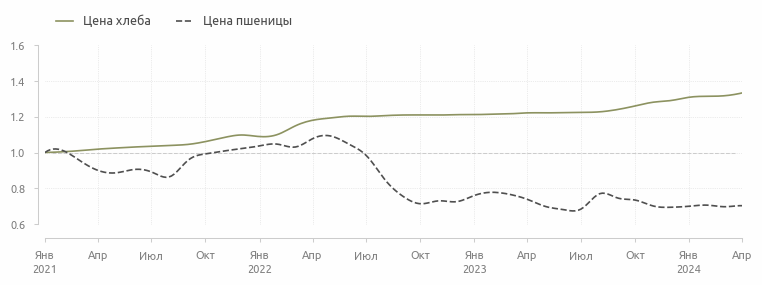

Images 'price-bread.png' and 'price-bread.svg' successfully saved into 'docs/img/' directory


In [930]:
fig = plt.figure()

plt.plot(
    smoothed(normalized_by_first(bread), datetime_index=True),
    color=palette[6], label='Цена хлеба')
plt.plot(
    smoothed(normalized_by_first(wheat), datetime_index=True),
    ls='--', color=palette[0], label='Цена пшеницы')
plot_hline(1)

ax = ax_current()
ax_ = axis_secondary(pad=24, label_color='#808080')

ax.set_xlim(time_range)
ax.legend(**legend_inline(), handlelength=1.35)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%b'))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator([1, 4, 7, 10]))
ax_.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%Y'))
ax_.xaxis.set_major_locator(mpl.dates.MonthLocator(1))
axis_rstyle(
    spines_color='#CCCCCC',
    ticks_color='#CCCCCC',
    ticklabels_color='#808080',
    offset_bottom=5, offset_left=5, grid=True)
axis_translate_months()
# axis_dates_capitalize()
plt.show()

savefig('price-bread', dir=path_save_img, figure=fig, dpi=100)

In [931]:
set_location()

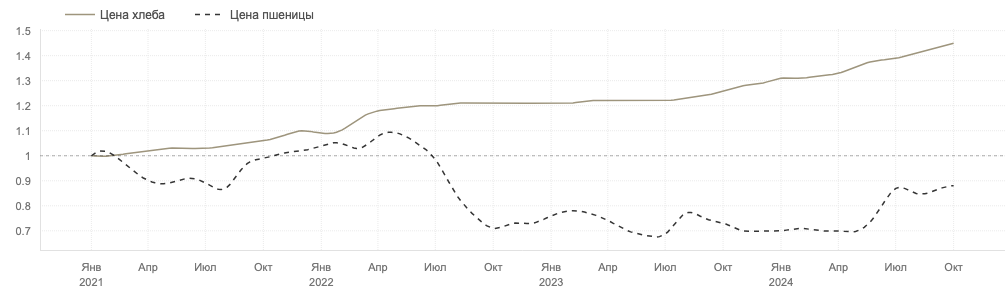

File 'price-bread.html' saved


In [932]:
fig = go.Figure(layout=dict(width=750, height=300))

fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(bread).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(bread).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[6], hoverinfo='skip', name='Цена хлеба'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(bread).round(2).index,
        y=normalized_by_first(bread).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[6], name='Цена хлеба', showlegend=False))
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(wheat).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(wheat).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[-5], line_dash='5px', hoverinfo='skip',
        name='Цена пшеницы'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(wheat).round(2).index,
        y=normalized_by_first(wheat).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[-5], showlegend=False,
        name='Цена пшеницы'))

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.1)
fig.update_layout(margin=dict(l=40))

pl_hline(1)

fig.show(config=config)
pl_savefig(figure=fig, name='price-bread', path=path_save_img, config=config, fmt='html')

#### Структура цены хлеба

In [933]:
bread_structure = {
    'сырье': 24.97,
    'расходы на производство': 27.34,
    'коммерческие расходы': 7.60,
    'прибыль предприятий, осуществляющих производство': 11.88,
    'НДС предприятий, осуществляющих производство': 7.19,
    'другие виды налогов': 0.03,
    'плата за доставку товара покупателям': 0.76,
    'надбавка розничной торговли': 13.57,
    'НДС организациий розничной торговли': 6.66
}

In [934]:
sum(list(bread_structure.values()))

100.0

In [935]:
bread_structure_df = pd.DataFrame([bread_structure])

In [936]:
bread_structure_df

,сырье,расходы на производство,коммерческие расходы,"прибыль предприятий, осуществляющих производство","НДС предприятий, осуществляющих производство",другие виды налогов,плата за доставку товара покупателям,надбавка розничной торговли,НДС организациий розничной торговли
0,24.97,27.34,7.6,11.88,7.19,0.03,0.76,13.57,6.66


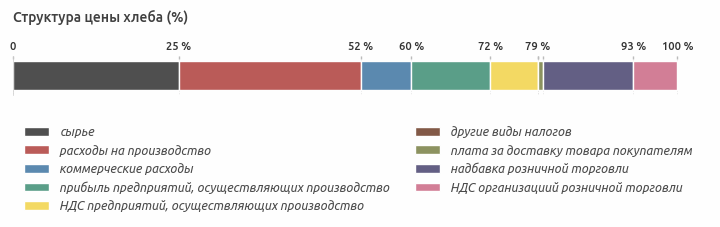

Images 'price-bread-structure.png' and 'price-bread-structure.svg' successfully saved into 'docs/img/' directory


In [937]:
columns_list = bread_structure_df.columns.tolist()
xticks = list(bread_structure.values())
xticks_cum = list(np.cumsum(xticks) - xticks)
xticks_cum.append(100)
xticks_labels = [str(int(round(x, 0))) + ' %' for x in xticks_cum]
xticks_labels[6:8] = ' ' * 2
xticks_labels[0] = '0'

fig = plt.figure(figsize=(9, 0.5))

zip_ = (columns_list, range(len(columns_list)))
for column, color in zip(*zip_):
    iloc_column = columns_list.index(column)
    previous_values_sum = bread_structure_df.iloc[:, :iloc_column].sum(axis=1)
    current_value = bread_structure_df[column].item()
    plt.barh(
        y=0.5, width=current_value, left=previous_values_sum,
        height=0.75, color=palette[color],
        label=column)

plt.xticks(xticks_cum, labels=xticks_labels, weight='medium', color=palette[-5])
plt.legend(
    loc='upper left', bbox_to_anchor=(0, -0.5),
    frameon=False, ncols=2, prop={'weight': 'normal', 'style': 'italic'})
plt.ylim(0, 1)
plt.yticks([])
plt.gca().xaxis.tick_top()
plt.gca().spines[['bottom']].set_visible(False)
plt.title('Структура цены хлеба (%)', pad=25, color='#404040')
plt.show()

savefig('price-bread-structure', dir=path_save_img, figure=fig, dpi=100)

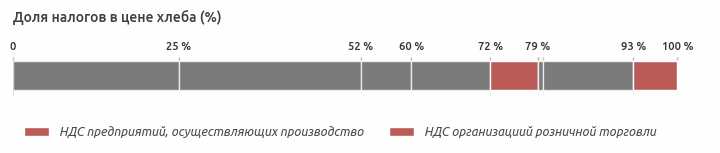

Images 'price-bread-structure-tax.png' and 'price-bread-structure-tax.svg' successfully saved into 'docs/img/' directory


In [938]:
columns_list = bread_structure_df.columns.tolist()
xticks = list(bread_structure.values())
xticks_cum = list(np.cumsum(xticks) - xticks)
xticks_cum.append(100)
xticks_labels = [str(int(round(x, 0))) + ' %' for x in xticks_cum]
xticks_labels[6:8] = ' ' * 2
xticks_labels[0] = '0'

fig = plt.figure(figsize=(9, 0.5))

zip_ = (columns_list, range(len(columns_list)))
for column, color in zip(*zip_):
    if column in [
        'НДС предприятий, осуществляющих производство', 
        'НДС организациий розничной торговли']:
        color = 1
        alpha = 1
        label = column
    else:
        color = 0
        alpha = 0.75
        label = None
        
    iloc_column = columns_list.index(column)
    previous_values_sum = bread_structure_df.iloc[:, :iloc_column].sum(axis=1)
    current_value = bread_structure_df[column].item()
    plt.barh(
        y=0.5, width=current_value, left=previous_values_sum,
        height=0.75, color=palette[color], alpha=alpha,
        label=label)
    
plt.xticks(xticks_cum, labels=xticks_labels, weight='medium', color=palette[-5])
plt.legend(
    loc='upper left', bbox_to_anchor=(0, -0.5),
    frameon=False, ncols=3, prop={'weight': 'normal', 'style': 'italic'})
plt.ylim(0, 1)
plt.yticks([])
plt.gca().xaxis.tick_top()
plt.gca().spines[['bottom']].set_visible(False)
plt.title('Доля налогов в цене хлеба (%)', pad=25, color='#404040')
plt.show()

savefig('price-bread-structure-tax', dir=path_save_img, figure=fig, dpi=100)

#### Мясо

##### Говядина

In [939]:
animals_2021 = prices_food_2021['крупный рогатый скот'].copy()
animals_2022 = prices_food_2022['крупный рогатый скот'].copy()
animals_2023 = prices_food_2023['крупный рогатый скот'].copy()
animals_2024 = prices_food_2024['крупный рогатый скот'].copy()

In [940]:
animals =  pd.concat(
    [animals_2021, animals_2022, animals_2023, animals_2024], axis=0)

In [941]:
animals.index =  [to_date(x) for x in animals.index]

In [942]:
animals = 0.001 * animals

In [943]:
animals.tail()

2024-06-01    174.7686
2024-07-01    175.7852
2024-08-01    177.6060
2024-09-01    176.8586
2024-10-01    188.5474
Name: крупный рогатый скот, dtype: float64

In [944]:
beef_2021 = prices_food_2021_consumers['говядина (кроме бескостного мяса), кг'].copy()
beef_2022 = prices_food_2022_consumers['говядина (кроме бескостного мяса), кг'].copy()
beef_2023 = prices_food_2023_consumers['говядина (кроме бескостного мяса), кг'].copy()
beef_2024 = prices_food_2024_consumers['говядина (кроме бескостного мяса), кг'].copy()

In [945]:
beef = pd.concat([
    beef_2021, beef_2022, beef_2023, beef_2024
], axis=0)

In [946]:
beef.index =  [to_date(x) for x in beef.index]

In [947]:
beef.tail()

2024-06-01    560.88
2024-07-01    564.19
2024-08-01    566.42
2024-09-01    572.23
2024-10-01    577.83
Name: говядина (кроме бескостного мяса), кг, dtype: object

In [948]:
beef_clean_2021 = prices_food_2021_consumers['говядина бескостная, кг'].copy()
beef_clean_2022 = prices_food_2022_consumers['говядина бескостная, кг'].copy()
beef_clean_2023 = prices_food_2023_consumers['говядина бескостная, кг'].copy()
beef_clean_2024 = prices_food_2024_consumers['говядина бескостная, кг'].copy()

In [949]:
beef_clean = pd.concat([
    beef_clean_2021, beef_clean_2022, beef_clean_2023, beef_clean_2024
], axis=0)

In [950]:
beef_clean.index =  [to_date(x) for x in beef_clean.index]

In [951]:
beef_clean.tail()

2024-06-01     765.9
2024-07-01    769.95
2024-08-01    773.11
2024-09-01    780.09
2024-10-01    789.85
Name: говядина бескостная, кг, dtype: object

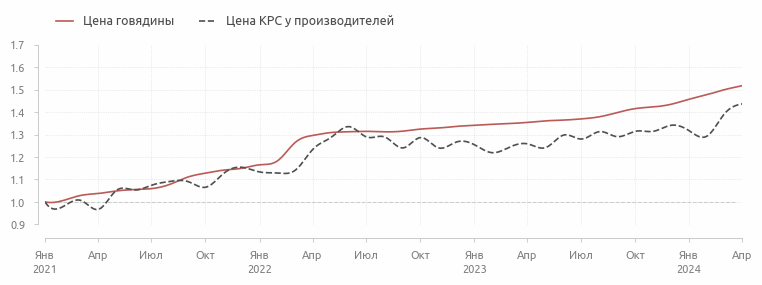

Images 'price-beef.png' and 'price-beef.svg' successfully saved into 'docs/img/' directory


In [952]:
fig = plt.figure()

plt.plot(
    smoothed(normalized_by_first(beef), datetime_index=True),
    color=palette[1], label='Цена говядины')
plt.plot(
    smoothed(normalized_by_first(animals), datetime_index=True),
    ls='--', color=palette[0], label='Цена КРС у производителей')
plot_hline(1)

ax = ax_current()
ax_ = axis_secondary(pad=24, label_color='#808080')

ax.set_xlim(time_range)
ax.legend(**legend_inline(), handlelength=1.35)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%b'))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator([1, 4, 7, 10]))
ax_.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%Y'))
ax_.xaxis.set_major_locator(mpl.dates.MonthLocator(1))
axis_rstyle(offset_bottom=5, offset_left=5, grid=True)
axis_translate_months()
plt.show()

savefig('price-beef', dir=path_save_img, figure=fig, dpi=100)

In [953]:
set_location()

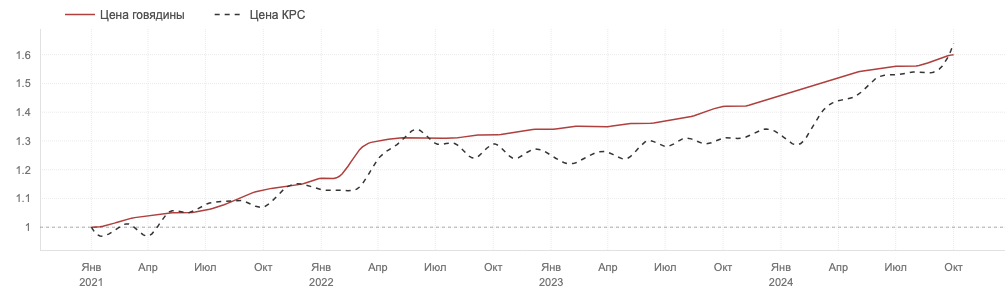

File 'price-beef.html' saved


In [954]:
fig = go.Figure(layout=dict(width=750, height=300))

fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(beef).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(beef).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[1], hoverinfo='skip', name='Цена говядины'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(beef).round(2).index,
        y=normalized_by_first(beef).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[1], name='Цена говядины', showlegend=False))
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(animals).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(animals).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[-5], line_dash='5px', hoverinfo='skip', name='Цена КРС'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(animals).round(2).index,
        y=normalized_by_first(animals).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[-5], name='Цена КРС', showlegend=False))

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.1)

pl_hline(1)

fig.show(config=config)
pl_savefig(figure=fig, name='price-beef', path=path_save_img, config=config, fmt='html')

##### Свинина

In [955]:
pig_raw_2021 = prices_food_2021['свиньи'].copy()
pig_raw_2022 = prices_food_2022['свиньи'].copy()
pig_raw_2023 = prices_food_2023['свиньи'].copy()
pig_raw_2024 = prices_food_2024['свиньи'].copy()

In [956]:
pig_raw =  pd.concat([
    pig_raw_2021, pig_raw_2022, pig_raw_2023, pig_raw_2024
], axis=0)

In [957]:
pig_raw.index =  [to_date(x) for x in pig_raw.index]

In [958]:
pig_raw = 0.001 * pig_raw

In [959]:
pig_raw.tail()

2024-06-01    120.9042
2024-07-01    110.9891
2024-08-01    117.1662
2024-09-01    127.2404
2024-10-01    122.2589
Name: свиньи, dtype: float64

In [960]:
pig_clean_2021 = prices_food_2021_consumers['свинина бескостная, кг'].copy()
pig_clean_2022 = prices_food_2022_consumers['свинина бескостная, кг'].copy()
pig_clean_2023 = prices_food_2023_consumers['свинина бескостная, кг'].copy()
pig_clean_2024 = prices_food_2024_consumers['свинина бескостная, кг'].copy()

In [961]:
pig_clean = pd.concat([
    pig_clean_2021, pig_clean_2022, pig_clean_2023, pig_clean_2024
], axis=0)

In [962]:
pig_clean.index =  [to_date(x) for x in pig_clean.index]

In [963]:
pig_clean.tail()

2024-06-01    460.59
2024-07-01    460.75
2024-08-01    464.27
2024-09-01    468.26
2024-10-01     469.1
Name: свинина бескостная, кг, dtype: object

In [964]:
pig_2021 = prices_food_2021_consumers['свинина (кроме бескостного мяса), кг'].copy()
pig_2022 = prices_food_2022_consumers['свинина (кроме бескостного мяса), кг'].copy()
pig_2023 = prices_food_2023_consumers['свинина (кроме бескостного мяса), кг'].copy()
pig_2024 = prices_food_2024_consumers['свинина (кроме бескостного мяса), кг'].copy()

In [965]:
pig = pd.concat([
    pig_2021, pig_2022, pig_2023, pig_2024
], axis=0)

In [966]:
pig.index = [to_date(x) for x in pig.index]

In [967]:
pig.tail()

2024-06-01    345.91
2024-07-01    346.01
2024-08-01    352.06
2024-09-01    358.39
2024-10-01    359.29
Name: свинина (кроме бескостного мяса), кг, dtype: object

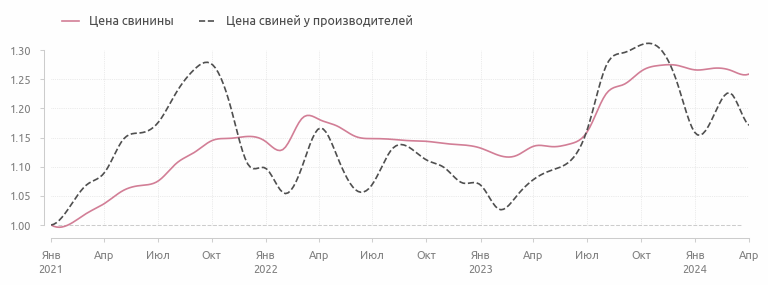

Images 'price-pig.png' and 'price-pig.svg' successfully saved into 'docs/img/' directory


In [968]:
fig = plt.figure()

plt.plot(
    smoothed(normalized_by_first(pig), datetime_index=True),
    color=palette[8], label='Цена свинины')
plt.plot(
    smoothed(normalized_by_first(pig_raw), datetime_index=True),
    ls='--', color=palette[0], label='Цена свиней у производителей')
plot_hline(1)

ax = ax_current()
ax_ = axis_secondary(pad=24, label_color='#808080')

ax.set_xlim(time_range)
ax.legend(**legend_inline(), handlelength=1.35)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%b'))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator([1, 4, 7, 10]))
ax_.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%Y'))
ax_.xaxis.set_major_locator(mpl.dates.MonthLocator(1))
axis_rstyle(
    offset_bottom=5, offset_left=5,
    yticks=[1, 1.31, 0.05], ylim=[0.99, 1.32], grid=True)
axis_translate_months()
plt.show()

savefig('price-pig', dir=path_save_img, figure=fig, dpi=100)

In [969]:
set_location()

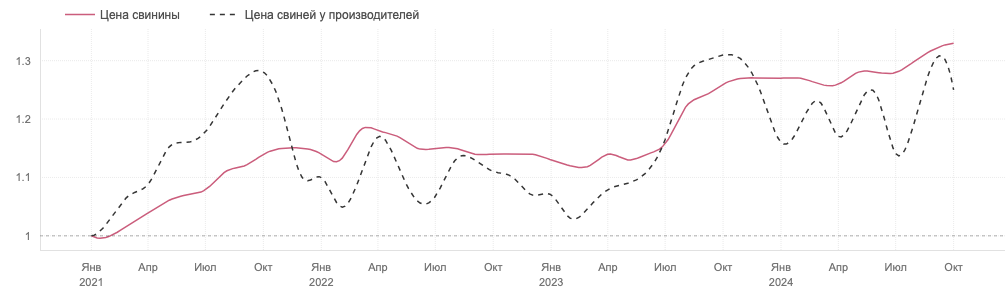

File 'price-pig.html' saved


In [970]:
fig = go.Figure(layout=dict(width=750, height=300))

fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(pig).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(pig).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[8], hoverinfo='skip',
        name='Цена свинины'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(pig).round(2).index,
        y=normalized_by_first(pig).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[8], showlegend=False,
        name='Цена свинины'))
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(pig_raw).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(pig_raw).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[-5], line_dash='5px', hoverinfo='skip',
        name='Цена свиней у производителей'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(pig_raw).round(2).index,
        y=normalized_by_first(pig_raw).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[-5], showlegend=False,
        name='Цена свиней у производителей'))

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.1)

pl_hline(1)

fig.show(config=config)
pl_savefig(figure=fig, name='price-pig', path=path_save_img, config=config, fmt='html')

##### Курица

In [971]:
poultry_2021_raw = prices_food_2021['птица сельскохозяйственная живая'].copy()
poultry_2022_raw = prices_food_2022['птица сельскохозяйственная живая'].copy()
poultry_2023_raw = prices_food_2023['птица сельскохозяйственная живая'].copy()
poultry_2024_raw = prices_food_2024['птица сельскохозяйственная живая'].copy()

In [972]:
poultry_raw =  pd.concat([
    poultry_2021_raw, poultry_2022_raw, poultry_2023_raw, poultry_2024_raw
], axis=0)

In [973]:
poultry_raw.index =  [to_date(x) for x in poultry_raw.index]

In [974]:
poultry_raw = 0.001 * poultry_raw

In [975]:
poultry_raw.tail()

2024-06-01    119.0626
2024-07-01    118.6129
2024-08-01    117.1720
2024-09-01    114.2377
2024-10-01    113.2314
Name: птица сельскохозяйственная живая, dtype: float64

In [976]:
poultry_2021 = prices_food_2021_consumers['куры охлажденные и мороженые, кг'].copy()
poultry_2022 = prices_food_2022_consumers['куры охлажденные и мороженые, кг'].copy()
poultry_2023 = prices_food_2023_consumers['куры охлажденные и мороженые, кг'].copy()
poultry_2024 = prices_food_2024_consumers['куры охлажденные и мороженые, кг'].copy()

In [977]:
poultry =  pd.concat([
    poultry_2021, poultry_2022, poultry_2023, poultry_2024
], axis=0)

In [978]:
poultry.index = [to_date(x) for x in poultry.index]

In [979]:
poultry.tail()

2024-06-01    221.39
2024-07-01    220.53
2024-08-01    219.63
2024-09-01     217.0
2024-10-01    214.55
Name: куры охлажденные и мороженые, кг, dtype: object

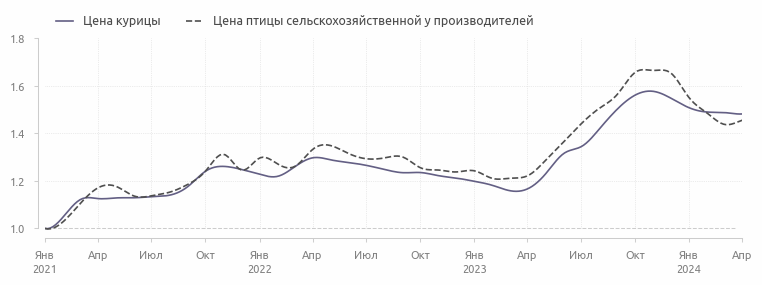

Images 'price-poultry.png' and 'price-poultry.svg' successfully saved into 'docs/img/' directory


In [980]:
fig = plt.figure()

plt.plot(
    smoothed(normalized_by_first(poultry), datetime_index=True),
    color=palette[7], label='Цена курицы')
plt.plot(
    smoothed(normalized_by_first(poultry_raw), datetime_index=True), ls='--',
    label='Цена птицы сельскохозяйственной у производителей')
plot_hline(1)

ax = ax_current()
ax_ = axis_secondary(pad=24, label_color='#808080')

ax.set_xlim(time_range)
ax.legend(**legend_inline(), handlelength=1.35)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%b'))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator([1, 4, 7, 10]))
ax_.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%Y'))
ax_.xaxis.set_major_locator(mpl.dates.MonthLocator(1))
axis_rstyle(
    offset_bottom=5, offset_left=5,
    ylim=[0.99, 1.8], yticks=[1, 1.8, 0.2], grid=True)
axis_translate_months()
plt.show()

savefig('price-poultry', dir=path_save_img, figure=fig, dpi=100)

In [981]:
set_location()

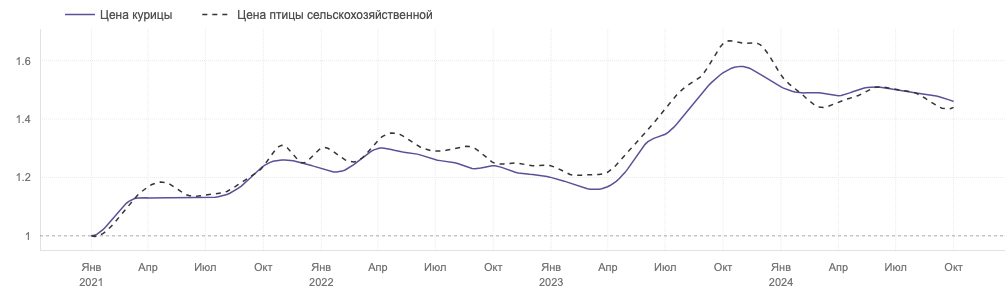

File 'price-poultry.html' saved


In [982]:
fig = go.Figure(layout=dict(width=750, height=300))

fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(poultry).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(poultry).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[7], hoverinfo='skip', name='Цена курицы'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(poultry).round(2).index,
        y=normalized_by_first(poultry).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[7], name='Цена курицы', showlegend=False))
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(poultry_raw).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(poultry_raw).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[-5], line_dash='5px', hoverinfo='skip',
        name='Цена птицы сельскохозяйственной'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(poultry_raw).round(2).index,
        y=normalized_by_first(poultry_raw).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[-5], showlegend=False,
        name='Цена птицы сельскохозяйственной'))

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.2)

pl_hline(1)

fig.show(config=config)
pl_savefig(figure=fig, name='price-poultry', path=path_save_img, config=config, fmt='html')

#### Молочные продукты

##### Молоко

In [983]:
milk_2021_raw = prices_food_2021['молоко сырое крупного рогатого скота'].copy()
milk_2022_raw = prices_food_2022['молоко сырое крупного рогатого скота'].copy()
milk_2023_raw = prices_food_2023['молоко сырое крупного рогатого скота'].copy()
milk_2024_raw = prices_food_2024['молоко сырое крупного рогатого скота'].copy()

In [984]:
milk_raw =  pd.concat([
    milk_2021_raw, milk_2022_raw, milk_2023_raw, milk_2024_raw
], axis=0)

In [985]:
milk_raw.index =  [to_date(x) for x in milk_raw.index]

In [986]:
milk_raw = 0.001 * milk_raw

In [987]:
milk_raw.tail()

2024-06-01    34.1313
2024-07-01    34.0299
2024-08-01    34.6299
2024-09-01    35.8594
2024-10-01    37.7767
Name: молоко сырое крупного рогатого скота, dtype: float64

In [988]:
milk_2021 = \
    prices_food_2021_consumers['молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л'].copy()
milk_2022 = \
    prices_food_2022_consumers['молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л'].copy()
milk_2023 = \
    prices_food_2023_consumers['молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л'].copy()
milk_2024 = \
    prices_food_2024_consumers['молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л'].copy()

In [989]:
milk = pd.concat([
    milk_2021, milk_2022, milk_2023, milk_2024
], axis=0)

In [990]:
milk.index = [to_date(x) for x in milk.index]

In [991]:
milk.tail()

2024-06-01     78.5
2024-07-01     78.9
2024-08-01    79.65
2024-09-01    82.35
2024-10-01    84.77
Name: молоко питьевое цельное пастеризованное 2,5-3,2% жирности, л, dtype: object

##### Сыр

In [992]:
cheese_2021 = prices_food_2021_consumers['сыры сычужные твердые и мягкие, кг'].copy()
cheese_2022 = prices_food_2022_consumers['сыры сычужные твердые и мягкие, кг'].copy()
cheese_2023 = prices_food_2023_consumers['сыры твердые, полутвердые и мягкие, кг'].copy()
cheese_2024 = prices_food_2024_consumers['сыры твердые, полутвердые и мягкие, кг'].copy()

In [993]:
cheese =  pd.concat([
    cheese_2021, cheese_2022, cheese_2023, cheese_2024
], axis=0)

In [994]:
cheese.index =  [to_date(x) for x in cheese.index]

In [995]:
cheese.tail()

2024-06-01    800.29
2024-07-01    800.55
2024-08-01    805.99
2024-09-01    817.66
2024-10-01     838.0
dtype: object

##### Сметана

In [996]:
sour_cream_2021 = prices_food_2021_consumers['сметана, кг'].copy()
sour_cream_2022 = prices_food_2022_consumers['сметана, кг'].copy()
sour_cream_2023 = prices_food_2023_consumers['сметана, кг'].copy()
sour_cream_2024 = prices_food_2024_consumers['сметана, кг'].copy()

In [997]:
sour_cream =  pd.concat([
    sour_cream_2021, sour_cream_2022, sour_cream_2023, sour_cream_2024
], axis=0)

In [998]:
sour_cream.index = [to_date(x) for x in sour_cream.index]

In [999]:
sour_cream.tail()

2024-06-01    294.84
2024-07-01    295.78
2024-08-01    298.19
2024-09-01    310.57
2024-10-01    320.34
Name: сметана, кг, dtype: object

##### Йогурт

In [1000]:
jogurt_2021 = prices_food_2021_consumers['йогурт, 125 г'].copy()
jogurt_2022 = prices_food_2022_consumers['йогурт, кг'].copy()
jogurt_2023 = prices_food_2023_consumers['йогурт, кг'].copy()
jogurt_2024 = prices_food_2024_consumers['йогурт, кг'].copy()

In [1001]:
# transform 0.125 kg of 2021 prices to 1 kg as in 2022 and 2023 price
jogurt_2021 = jogurt_2021 / 0.125

In [1002]:
jogurt =  pd.concat([
    jogurt_2021, jogurt_2022, jogurt_2023, jogurt_2024
], axis=0)

In [1003]:
jogurt.index = [to_date(x) for x in jogurt.index]

In [1004]:
jogurt.tail()

2024-06-01    292.08
2024-07-01    293.09
2024-08-01    293.58
2024-09-01    298.43
2024-10-01    302.35
dtype: object

##### Масло сливочное

In [1005]:
butter_2021 = prices_food_2021_consumers['масло сливочное, кг'].copy()
butter_2022 = prices_food_2022_consumers['масло сливочное, кг'].copy()
butter_2023 = prices_food_2023_consumers['масло сливочное, кг'].copy()
butter_2024 = prices_food_2024_consumers['масло сливочное, кг'].copy()

In [1006]:
butter =  pd.concat([
    butter_2021, butter_2022, butter_2023, butter_2024
], axis=0)

In [1007]:
butter.index = [to_date(x) for x in butter.index]

In [1008]:
butter.tail()

2024-06-01     927.26
2024-07-01     942.33
2024-08-01     970.27
2024-09-01    1021.91
2024-10-01    1096.11
Name: масло сливочное, кг, dtype: object

##### Творог

В 2022 году изменилась номенклатура: 'творог жирный' и 'творог нежирный' заменем одним показателем - 'творог'.  
Данные для 2021 года считаются как среднее от 'творог жирный' и 'творог нежирный'.

In [1009]:
# mean of pd.Series using Numpy
cottage_cheese_2021 = pd.concat(
    [prices_food_2021_consumers['творог нежирный, кг'],
     prices_food_2021_consumers['творог жирный, кг']],
    axis=1).agg('mean', 1)

cottage_cheese_2022 = prices_food_2022_consumers['творог, кг'].copy()
cottage_cheese_2023 = prices_food_2023_consumers['творог, кг'].copy()
cottage_cheese_2024 = prices_food_2024_consumers['творог, кг'].copy()

In [1010]:
cottage_cheese =  pd.concat([
    cottage_cheese_2021, cottage_cheese_2022, cottage_cheese_2023, cottage_cheese_2024
], axis=0)

In [1011]:
cottage_cheese.index = [to_date(x) for x in cottage_cheese.index]

In [1012]:
cottage_cheese.tail()

2024-06-01    418.34
2024-07-01    418.09
2024-08-01     420.8
2024-09-01    429.87
2024-10-01    438.87
dtype: object

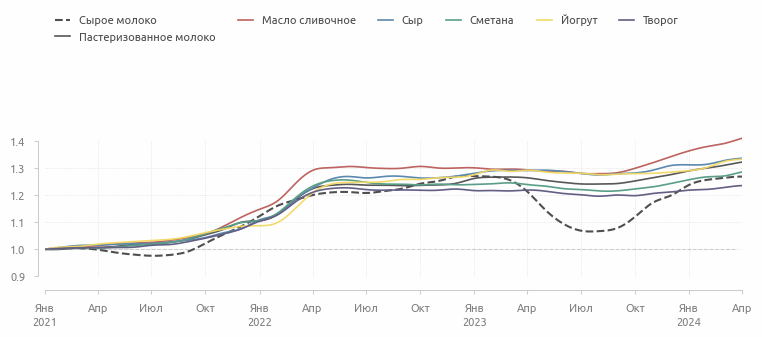

Images 'price-milk-products.png' and 'price-milk-products.svg' successfully saved into 'docs/img/' directory


In [1013]:
fig = plt.figure(figsize=(9, 3))

plt.plot(
    smoothed(normalized_by_first(milk_raw), datetime_index=True), lw=1.5, ls='--',
    color=palette[0], label='Сырое молоко')
plt.plot(
    smoothed(normalized_by_first(milk), datetime_index=True),
    alpha=0.95, label='Пастеризованное молоко')
plt.plot(
    smoothed(normalized_by_first(butter), datetime_index=True),
    alpha=0.95, label='Масло сливочное')
plt.plot(
    smoothed(normalized_by_first(cheese), datetime_index=True),
    alpha=1, label='Сыр')
plt.plot(
    smoothed(normalized_by_first(sour_cream), datetime_index=True), 
    label='Сметана')
plt.plot(
    smoothed(normalized_by_first(jogurt), datetime_index=True),
    alpha=0.95, label='Йогрут')
plt.plot(
    smoothed(normalized_by_first(cottage_cheese), datetime_index=True),
    label='Творог', color=palette[7])
plot_hline(1)

ax = ax_current()
ax_ = axis_secondary(pad=24, label_color='#808080')

ax.set_xlim(time_range)
ax.legend(**legend_inline(6), handlelength=1.35, fontsize=8)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%b'))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator([1, 4, 7, 10]))
ax_.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%Y'))
ax_.xaxis.set_major_locator(mpl.dates.MonthLocator(1))
axis_rstyle(offset_bottom=5, offset_left=5, yticks=[0.9, 1.4, 0.1], grid=True)
axis_translate_months()
plt.show()

savefig('price-milk-products', dir=path_save_img, figure=fig, dpi=100)

In [1014]:
set_location()

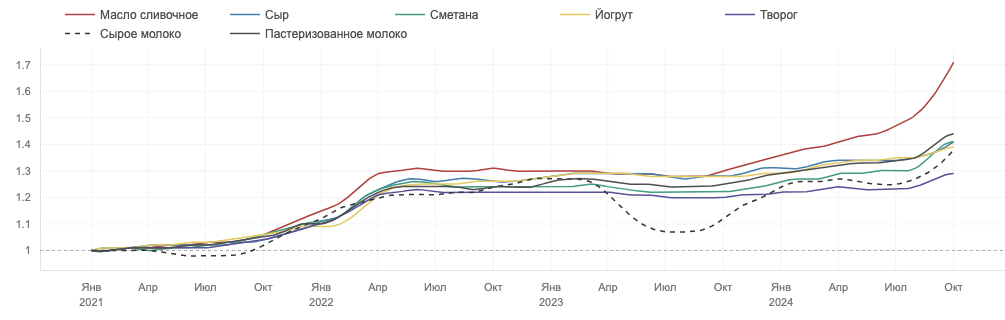

File 'price-milk-products.html' saved


In [1015]:
fig = go.Figure(layout=dict(width=750, height=320))

# масло
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(butter).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(butter).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[1], hoverinfo='skip',
        name='Масло сливочное'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(butter).round(2).index,
        y=normalized_by_first(butter).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[1], showlegend=False,
        name='Масло сливочное'))
# сыр
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(cheese).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(cheese).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[2], hoverinfo='skip',
        name='Сыр'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(cheese).round(2).index,
        y=normalized_by_first(cheese).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[2], showlegend=False,
        name='Сыр'))
# Сметана
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(sour_cream).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(sour_cream).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[3], hoverinfo='skip',
        name='Сметана'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(sour_cream).round(2).index,
        y=normalized_by_first(sour_cream).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[3], showlegend=False,
        name='Сметана'))
# Йогрут
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(jogurt).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(jogurt).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[4], hoverinfo='skip',
        name='Йогрут'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(jogurt).round(2).index,
        y=normalized_by_first(jogurt).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[4], showlegend=False,
        name='Йогрут'))
# Творог
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(cottage_cheese).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(cottage_cheese).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[7], hoverinfo='skip',
        name='Творог'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(cottage_cheese).round(2).index,
        y=normalized_by_first(cottage_cheese).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[7], showlegend=False,
        name='Творог'))
# молоко сырое
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(milk_raw).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(milk_raw).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[-5], line_dash='5px', hoverinfo='skip',
        name='Сырое молоко'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(milk_raw).round(2).index,
        y=normalized_by_first(milk_raw).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[-5], showlegend=False,
        name='Сырое молоко'))
# Пастеризованное молоко
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(milk).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(milk).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[0], hoverinfo='skip',
        name='Пастеризованное молоко'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(milk).round(2).index,
        y=normalized_by_first(milk).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[0], showlegend=False,
        name='Пастеризованное молоко'))

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.1)
fig.update_layout(legend=dict(entrywidth=100, entrywidthmode='pixels'))

pl_hline(1)

fig.show(config=config)
pl_savefig(figure=fig, name='price-milk-products', path=path_save_img, config=config, fmt='html')

#### Овощи

In [1016]:
vegetables_2021_raw = prices_food_2021['овощи'].copy()
vegetables_2022_raw = prices_food_2022['овощи'].copy()
vegetables_2023_raw = prices_food_2023['овощи'].copy()
vegetables_2024_raw = prices_food_2024['овощи'].copy()

In [1017]:
vegetables_raw =  pd.concat([
    vegetables_2021_raw, vegetables_2022_raw, vegetables_2023_raw, vegetables_2024_raw
], axis=0)

In [1018]:
vegetables_raw.index =  [to_date(x) for x in vegetables_raw.index]

In [1019]:
vegetables_raw = 0.001 * vegetables_raw

In [1020]:
vegetables_raw.tail()

2024-06-01    97.8707
2024-07-01    95.2089
2024-08-01    81.5908
2024-09-01    71.8217
2024-10-01    70.3052
Name: овощи, dtype: float64

In [1021]:
potato_2021_raw = prices_food_2021['картофель'].copy()
potato_2022_raw = prices_food_2022['картофель'].copy()
potato_2023_raw = prices_food_2023['картофель'].copy()
potato_2024_raw = prices_food_2024['картофель'].copy()

In [1022]:
potato_raw =  pd.concat([
    potato_2021_raw, potato_2022_raw, potato_2023_raw, potato_2024_raw
], axis=0)

In [1023]:
potato_raw.index =  [to_date(x) for x in potato_raw.index]

In [1024]:
potato_raw = 0.001 * potato_raw

In [1025]:
potato_raw.tail()

2024-06-01    16.7125
2024-07-01    23.1763
2024-08-01    23.1308
2024-09-01    18.8519
2024-10-01    17.1033
Name: картофель, dtype: float64

In [1026]:
potato_2021 = prices_food_2021_consumers['картофель, кг'].copy()
potato_2022 = prices_food_2022_consumers['картофель, кг'].copy()
potato_2023 = prices_food_2023_consumers['картофель, кг'].copy()
potato_2024 = prices_food_2024_consumers['картофель, кг'].copy()

In [1027]:
potato =  pd.concat([
    potato_2021, potato_2022, potato_2023, potato_2024
], axis=0)

In [1028]:
potato.index =  [to_date(x) for x in potato.index]

In [1029]:
potato.tail()

2024-06-01    56.31
2024-07-01    57.51
2024-08-01     52.1
2024-09-01    43.94
2024-10-01    45.95
Name: картофель, кг, dtype: object

In [1030]:
cucumber_2021 = prices_food_2021_consumers['огурцы свежие, кг'].copy()
cucumber_2022 = prices_food_2022_consumers['огурцы свежие, кг'].copy()
cucumber_2023 = prices_food_2023_consumers['огурцы свежие, кг'].copy()
cucumber_2024 = prices_food_2024_consumers['огурцы свежие, кг'].copy()

In [1031]:
cucumber =  pd.concat([
    cucumber_2021, cucumber_2022, cucumber_2023, cucumber_2024
], axis=0)

In [1032]:
cucumber.index =  [to_date(x) for x in cucumber.index]

In [1033]:
cucumber.tail()

2024-06-01    120.79
2024-07-01    120.76
2024-08-01    121.74
2024-09-01    129.17
2024-10-01    134.26
Name: огурцы свежие, кг, dtype: object

In [1034]:
tomato_2021 = prices_food_2021_consumers['помидоры свежие, кг'].copy()
tomato_2022 = prices_food_2022_consumers['помидоры свежие, кг'].copy()
tomato_2023 = prices_food_2023_consumers['помидоры свежие, кг'].copy()
tomato_2024 = prices_food_2024_consumers['помидоры свежие, кг'].copy()

In [1035]:
tomato =  pd.concat([
    tomato_2021, tomato_2022, tomato_2023, tomato_2024
], axis=0)

In [1036]:
tomato.index =  [to_date(x) for x in tomato.index]

In [1037]:
tomato.tail()

2024-06-01    187.94
2024-07-01    179.27
2024-08-01    167.42
2024-09-01    169.97
2024-10-01    175.31
Name: помидоры свежие, кг, dtype: object

In [1038]:
onion_2021 = prices_food_2021_consumers['лук репчатый, кг'].copy()
onion_2022 = prices_food_2022_consumers['лук репчатый, кг'].copy()
onion_2023 = prices_food_2023_consumers['лук репчатый, кг'].copy()
onion_2024 = prices_food_2024_consumers['лук репчатый, кг'].copy()

In [1039]:
onion =  pd.concat([
    onion_2021, onion_2022, onion_2023, onion_2024
], axis=0)

In [1040]:
onion.index =  [to_date(x) for x in onion.index]

In [1041]:
onion.tail()

2024-06-01    46.99
2024-07-01     45.3
2024-08-01    43.52
2024-09-01     39.4
2024-10-01    41.15
Name: лук репчатый, кг, dtype: object

In [1042]:
carrot_2021 = prices_food_2021_consumers['морковь, кг'].copy()
carrot_2022 = prices_food_2022_consumers['морковь, кг'].copy()
carrot_2023 = prices_food_2023_consumers['морковь, кг'].copy()
carrot_2024 = prices_food_2024_consumers['морковь, кг'].copy()

In [1043]:
carrot =  pd.concat([
    carrot_2021, carrot_2022, carrot_2023, carrot_2024
], axis=0)

In [1044]:
carrot.index =  [to_date(x) for x in carrot.index]

In [1045]:
carrot.tail()

2024-06-01    70.06
2024-07-01    65.25
2024-08-01    57.34
2024-09-01    47.86
2024-10-01    44.77
Name: морковь, кг, dtype: object

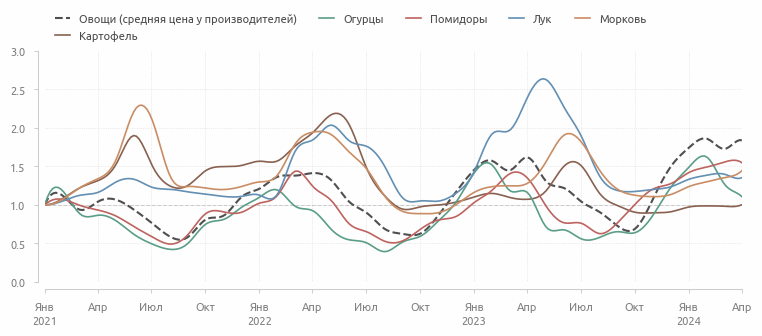

Images 'price-vegetables.png' and 'price-vegetables.svg' successfully saved into 'docs/img/' directory


In [1046]:
fig = plt.figure(figsize=(9, 3))

plt.plot(
    smoothed(normalized_by_first(vegetables_raw), datetime_index=True), lw=1.5, ls='--',
    color=palette[0], label='Овощи (средняя цена у производителей)')
plt.plot(
    smoothed(normalized_by_first(potato), datetime_index=True),
    color=alpha_color(palette[5], 0.95), label='Картофель')
plt.plot(
    smoothed(normalized_by_first(cucumber), datetime_index=True),
    color=alpha_color(palette[3], 1), label='Огурцы')
plt.plot(
    smoothed(normalized_by_first(tomato), datetime_index=True),
    color=alpha_color(palette[1], 0.95), label='Помидоры')
plt.plot(
    smoothed(normalized_by_first(onion), datetime_index=True),
    color=alpha_color(palette[2], 0.95), label='Лук')
plt.plot(
    smoothed(normalized_by_first(carrot), datetime_index=True),
    color=alpha_color(palette[9], 0.95), label='Морковь')
plot_hline(1)

ax = ax_current()
ax_ = axis_secondary(pad=24, label_color='#808080')

ax.set_xlim(time_range)
ax.legend(**legend_inline(5), handlelength=1.35, fontsize=8)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%b'))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator([1, 4, 7, 10]))
ax_.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%Y'))
ax_.xaxis.set_major_locator(mpl.dates.MonthLocator(1))
axis_rstyle(offset_bottom=5, offset_left=5, ylim=[0, 3], yticks=[0, 3], grid=True)
axis_translate_months()
plt.show()

savefig('price-vegetables', dir=path_save_img, figure=fig, dpi=100)

In [1047]:
set_location()

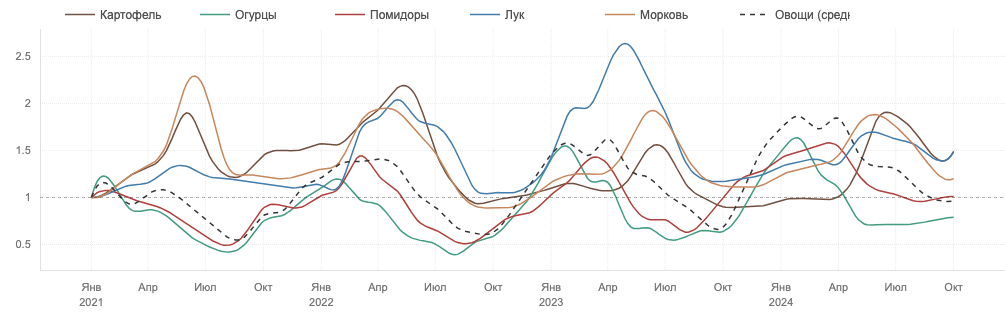

File 'price-vegetables.html' saved


In [1048]:
fig = go.Figure(layout=dict(width=750, height=320))

# картофель
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(potato).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(potato).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[5], hoverinfo='skip',
        name='Картофель'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(potato).round(2).index,
        y=normalized_by_first(potato).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[5], showlegend=False,
        name='Картофель'))
# Огурцы
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(cucumber).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(cucumber).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[3], hoverinfo='skip',
        name='Огурцы'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(cucumber).round(2).index,
        y=normalized_by_first(cucumber).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[3], showlegend=False,
        name='Огурцы'))
# Помидоры
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(tomato).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(tomato).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[1], hoverinfo='skip',
        name='Помидоры'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(tomato).round(2).index,
        y=normalized_by_first(tomato).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[1], showlegend=False,
        name='Помидоры'))
# Лук
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(onion).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(onion).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[2], hoverinfo='skip',
        name='Лук'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(onion).round(2).index,
        y=normalized_by_first(onion).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[2], showlegend=False,
        name='Лук'))
# Морковь
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(carrot).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(carrot).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[9], hoverinfo='skip',
        name='Морковь'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(carrot).round(2).index,
        y=normalized_by_first(carrot).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[9], showlegend=False,
        name='Морковь'))
# овощи
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(vegetables_raw).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(vegetables_raw).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[-5], line_dash='5px', hoverinfo='skip',
        name='Овощи (средняя цена у производителей)'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(vegetables_raw).round(2).index,
        y=normalized_by_first(vegetables_raw).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[-5], showlegend=False,
        name='Овощи (средняя цена у производителей)'))

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.5)
fig.update_layout(legend=dict(entrywidth=70, entrywidthmode='pixels'))

pl_hline(1)

fig.show(config=config)
pl_savefig(figure=fig, name='price-vegetables', path=path_save_img, config=config, fmt='html')

#### Яйца куриные

In [1049]:
eggs_2021_raw = prices_food_2021['яйца куриные в скорлупе свежие'].copy()
eggs_2022_raw = prices_food_2022['яйца куриные в скорлупе свежие'].copy()
eggs_2023_raw = prices_food_2023['яйца куриные в скорлупе свежие'].copy()
eggs_2024_raw = prices_food_2024['яйца куриные в скорлупе свежие'].copy()

In [1050]:
eggs_raw =  pd.concat([
    eggs_2021_raw, eggs_2022_raw, eggs_2023_raw, eggs_2024_raw
], axis=0)

In [1051]:
eggs_raw.index =  [to_date(x) for x in eggs_raw.index]

In [1052]:
# eggs price from 1000 eggs to 10 eggs
eggs_raw = 0.01 * eggs_raw

In [1053]:
eggs_raw.head()

2021-01-01    57.45
2021-02-01    57.49
2021-03-01    60.99
2021-04-01    67.53
2021-05-01    61.62
Name: яйца куриные в скорлупе свежие, dtype: float64

In [1054]:
eggs_2021 = prices_food_2021_consumers['яйца куриные, 10 шт.'].copy()
eggs_2022 = prices_food_2022_consumers['яйца куриные, 10 шт.'].copy()
eggs_2023 = prices_food_2023_consumers['яйца куриные, 10 шт.'].copy()
eggs_2024 = prices_food_2024_consumers['яйца куриные, 10 шт.'].copy()

In [1055]:
eggs =  pd.concat([
    eggs_2021, eggs_2022, eggs_2023, eggs_2024
], axis=0)

In [1056]:
eggs.index =  [to_date(x) for x in eggs.index]

In [1057]:
eggs.tail()

2024-06-01    111.32
2024-07-01    106.92
2024-08-01    104.92
2024-09-01    104.67
2024-10-01    106.31
Name: яйца куриные, 10 шт., dtype: object

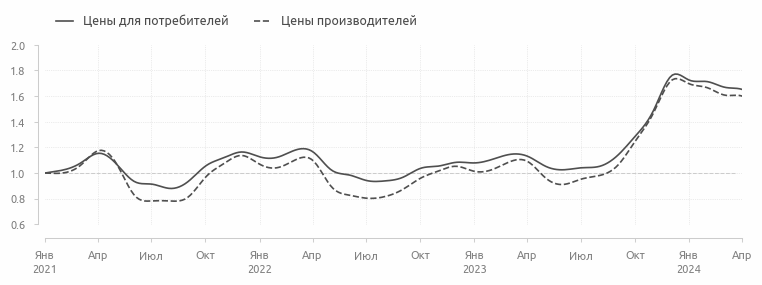

Images 'price-eggs.png' and 'price-eggs.svg' successfully saved into 'docs/img/' directory


In [1058]:
fig = plt.figure()

plt.plot(
    smoothed(normalized_by_first(eggs), datetime_index=True),
    color=palette[0], label='Цены для потребителей')
plt.plot(
    smoothed(normalized_by_first(eggs_raw), datetime_index=True), ls='--',
    label='Цены производителей')
plot_hline(1)

ax = ax_current()
ax_ = axis_secondary(pad=24, label_color='#808080')

ax.set_xlim(time_range)
ax.legend(**legend_inline(), handlelength=1.35)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%b'))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator([1, 4, 7, 10]))
ax_.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%Y'))
ax_.xaxis.set_major_locator(mpl.dates.MonthLocator(1))
axis_rstyle(offset_bottom=5, offset_left=5, grid=True)
axis_translate_months()
plt.show()

savefig('price-eggs', dir=path_save_img, figure=fig, dpi=100)

In [1059]:
set_location()

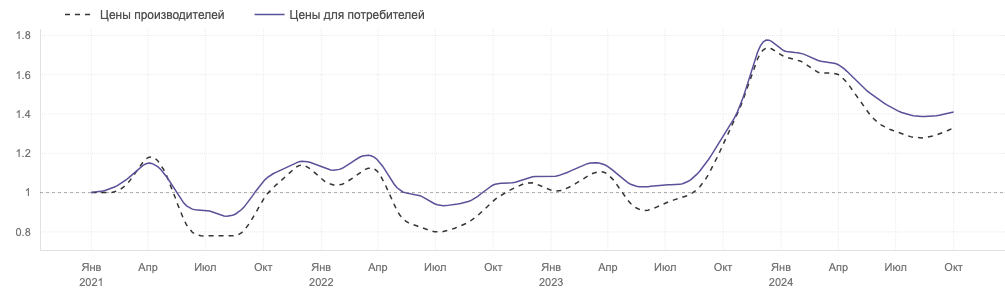

File 'price-eggs.html' saved


In [1060]:
fig = go.Figure(layout=dict(width=750, height=300))

fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(eggs_raw).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(eggs_raw).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[-5], line_dash='5px', hoverinfo='skip',
        name='Цены производителей'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(eggs_raw).round(2).index,
        y=normalized_by_first(eggs_raw).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[-5], showlegend=False,
        name='Цены производителей'))
fig.add_trace(
    go.Scatter(
        x=smoothed(normalized_by_first(eggs).round(2), datetime_index=True).index,
        y=smoothed(normalized_by_first(eggs).round(2),  datetime_index=True).values.ravel(),
        mode='lines', line_color=palette_pl[7], hoverinfo='skip',
        name='Цены для потребителей'))
fig.add_trace(
    go.Scatter(
        x=normalized_by_first(eggs).round(2).index,
        y=normalized_by_first(eggs).round(2).values.ravel(),
        marker=dict(opacity=0, size=5),
        mode='markers', line_color=palette_pl[7], showlegend=False,
        name='Цены для потребителей'))

fig.update_xaxes(dtick='M3', tickformat="%b<br>%Y", labelalias=xtickaliases)
fig.update_yaxes(dtick=0.2)

pl_hline(1)

fig.show(config=config)
pl_savefig(figure=fig, name='price-eggs', path=path_save_img, config=config, fmt='html')

# Households incomes and outcomes

### Динамика доходов домохозяйств в городской и сельской местности

In [1061]:
income = economics_data['7.1'].copy()

In [1062]:
income_plot_data = income[income['Тип'] == 'Всего'].T[1:].iloc[:, -2:].copy()

In [1063]:
income_plot_data['delta'] = \
    income_plot_data.iloc[:, 0] - income_plot_data.iloc[:, 1]

In [1064]:
income_plot_data['delta_town'] = \
    (income_plot_data['Домашние хозяйства, проживающиев городской местности']
     .pct_change()
     .mul(100))

income_plot_data['delta_country'] = \
    (income_plot_data['Домашние хозяйства, проживающиев сельской местности']
     .pct_change()
     .mul(100))

/var/folders/nw/326p1ny92vn5_07qgt9x6q500000gn/T/ipykernel_5809/3073320293.py:3: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/nw/326p1ny92vn5_07qgt9x6q500000gn/T/ipykernel_5809/3073320293.py:8: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [1065]:
income_plot_data['delta_pct'] = \
    income_plot_data['delta_town'] - income_plot_data['delta_country']

In [1066]:
income_plot_data['country/town'] = \
    (income_plot_data['Домашние хозяйства, проживающиев сельской местности']
     / income_plot_data['Домашние хозяйства, проживающиев городской местности'])

In [1067]:
income_plot_data.index = income_plot_data.index.astype(int)

In [1068]:
income_plot_data

,"Домашние хозяйства, проживающиев городской местности","Домашние хозяйства, проживающиев сельской местности",delta,delta_town,delta_country,delta_pct,country/town
2003,4009.0,2423.2,1585.8,NaN,NaN,NaN,0.60444
2004,5016.0,2851.3,2164.7,25.118483,17.666722,7.451762,0.568441
2005,6529.5,3604.7,2924.8,30.173445,26.423035,3.750410,0.552064
2006,7984.9,4495.4,3489.5,22.289609,24.709407,-2.419798,0.562988
2007,10354.6,5871.1,4483.5,29.677266,30.602394,-0.925128,0.567004
2008,13465.9,7786.5,5679.4,30.047515,32.624210,-2.576695,0.578238
2009,13869.4,8416.9,5452.5,2.996458,8.096064,-5.099606,0.606868
2010,16265.0,10128.7,6136.3,17.272557,20.337654,-3.065097,0.62273
2011,18291.1,11745.8,6545.3,12.456809,15.965524,-3.508715,0.642159
2012,20405.0,13320.3,7084.7,11.556987,13.404791,-1.847805,0.652796


In [1069]:
# protest
plot_text1 =  '''
    Протестные акции
    (декабрь 2011)
'''
# elections
plot_text2 = '''
    Выборы президента РФ
    (март 2012)
'''
plot_titles = [
    'Абсолютная разница в доходах городской и сельской местностей',
    'Отношение доходов в сельской местности к доходам в городской местности',
    'Разница в темпах роста городских и сельских доходов',
    'Разница в темпах роста городских и сельских доходов (тренд)'
]

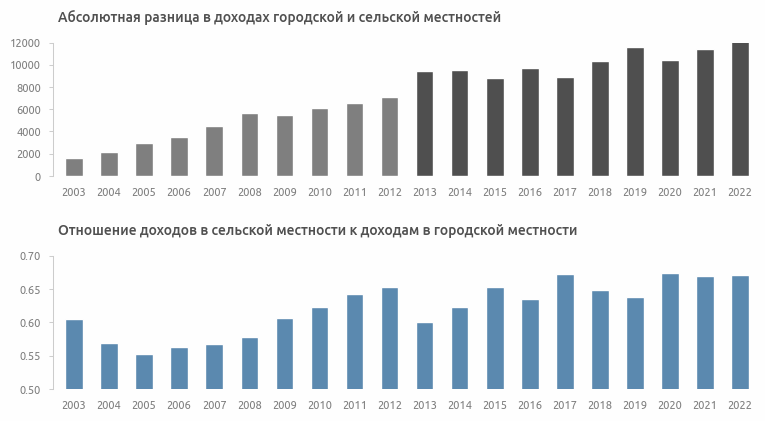

Images 'income-(cities)-1.png' and 'income-(cities)-1.svg' successfully saved into 'docs/img/' directory


In [1070]:
fig, ax = plt.subplots(2, 1, figsize=(9, 4.5))

ax[0].bar(
    height=income_plot_data['delta'][:10],
    x=income_plot_data.index[:10], width=0.5, color=palette[-4])
ax[0].bar(
    height=income_plot_data['delta'][10:],
    x=income_plot_data.index[10:], width=0.5, color=palette[0])
ax[0].set_xticks(ticks=income_plot_data.index)
ax[0].set_title(plot_titles[0])
ax[0].set_ylim(top=12000)
axis_rstyle(offset_left=3.5, ax=ax[0])
ax[0].tick_params(axis='x', bottom=False)
# adjust the length of spines
axis_adjust_barplot(line_hidden=True, pad=0, weight='normal', labelsize=8, ax=ax[0])

ax[1].bar(
    height=income_plot_data['country/town'],
    x=income_plot_data.index, width=0.5, color=palette[2])
ax[1].set_xticks(ticks=income_plot_data.index)
ax[1].set_title(plot_titles[1])
ax[1].set_ylim(0.5, 0.7)
axis_rstyle(offset_left=3.5, ax=ax[1])
ax[1].tick_params(axis='x', bottom=False)
# adjust the length of spines
axis_adjust_barplot(line_hidden=True, pad=0, weight='normal', labelsize=8, ax=ax[1])

plt.subplots_adjust(hspace=0.6)
plt.show()

savefig('income-(cities)-1', dir=path_save_img, figure=fig, dpi=100)

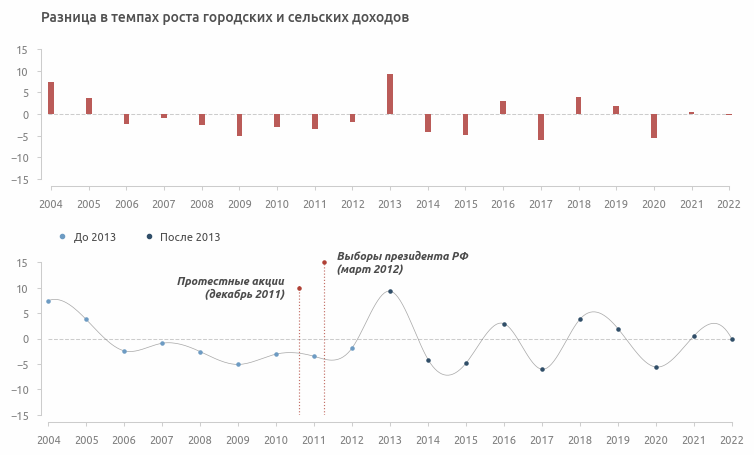

Images 'income-(cities)-2.png' and 'income-(cities)-2.svg' successfully saved into 'docs/img/' directory


In [1071]:
# fig = plt.figure(figsize=(9, 4.75))
fig, ax = plt.subplots(nrows=2, figsize=(9, 4.75), height_ratios=[1, 1.25])
# spec = fig.add_gridspec(2, 1, height_ratios=[1, 1.25])

# ax0
# ax = fig.add_subplot(spec[0, :])
ax[0].bar(
    height=income_plot_data['delta_pct'],
    x=income_plot_data.index, width=0.15,
    ec='none', color=palette[1], zorder=10)
plot_hline(ax=ax[0])
ax[0].set_xticks(ticks=income_plot_data.index)
ax[0].set_title(plot_titles[2], pad=20)
axis_rstyle(
    offset_left=0, offset_bottom=5, grid=False,
    yticks=[-15, 15], xticks=[2004, 2022], ax=ax[0])

# ax1
# ax = fig.add_subplot(spec[1, :])
ax[1].scatter(
    income_plot_data.index[:10], income_plot_data['delta_pct'][:10],
    s=5, color=palette[13], zorder=10)
ax[1].scatter(
    income_plot_data.index[10:], income_plot_data['delta_pct'][10:],
    s=5, color=palette[10], zorder=10)

ax[1].legend(
    **legend_inline(),
    **legend_create_handles(
        n=2, kind='p',
        labels=['До 2013', 'После 2013'],
        colors=[palette[13], palette[10]]),
    fontsize=8)
ax[1].plot(
    smoothed(income_plot_data['delta_pct'][1:], return_type='df'),
    lw=0.5, alpha=0.5, zorder=1)
plot_hline(ax=ax[1])
ax[1].set_ylim(top=17)
ax[1].set_xticks(ticks=income_plot_data.index)

plot_timemarker(
    text=plot_text1, x=2010.6, y_text=10, y_line=0.8, delta=0.4,
    weight='bold', style='italic', ha='right', ax=ax[1])
plot_timemarker(
    text=plot_text2, x=2011.25, y_text=15, y_line=0.93, delta=0.05,
    weight='bold', style='italic', ax=ax[1])
axis_rstyle(
    offset_left=0, offset_bottom=5,  grid=False,
    yticks=[-15, 15], xticks=[2004, 2022], ax=ax[1])

plt.subplots_adjust(hspace=0.5)
plt.show()

savefig('income-(cities)-2', dir=path_save_img, figure=fig, dpi=100)

### Структура расходов домохозяйств в городской местности

In [1072]:
spends = economics_data['7.2']

In [1073]:
spends.head()

,Тип,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Все домашние хозяйства,Всего,2989.3,3582.9,4490.0,5353.1,6842.6,8561.8,9054.0,10513.4,11715.1,...,14153.8,15094.3,15295.4,16632.5,17319.9,18031.4,19727.7,19180.8,21154.3,23787.9
Все домашние хозяйства,Расходы на питание,1337.7,1537.6,1765.0,1984.1,2321.1,2947.1,3276.1,3714.6,4078.1,...,4694.9,5111.0,5707.8,6220.7,6250.0,6352.4,6818.3,7101.9,7675.2,8852.7
Все домашние хозяйства,Расходы на непродовольственные товары,1029.2,1245.9,1639.0,1976.7,2735.0,3368.2,3287.3,3906.5,4444.2,...,5600.3,5860.0,5365.5,5696.8,6230.6,6484.0,7054.8,6901.0,7418.0,8232.7
Все домашние хозяйства,Расходы на алкогольные напитки,60.5,70.1,81.7,98.2,114.3,133.8,146.3,172.1,193.6,...,233.2,257.8,263.4,284.4,279.6,284.8,313.0,337.7,320.7,379.0
Все домашние хозяйства,Расходы на оплату услуг,545.1,711.6,994.6,1283.2,1660.5,2098.1,2329.2,2705.1,2984.5,...,3606.2,3849.0,3885.3,4388.7,4520.5,4871.6,5490.6,4785.4,5686.4,6265.3


##### Preparing data

In [1074]:
spends_plot_town = \
    spends.loc['Домашние хозяйства, проживающиев городской местности'].T.copy()

In [1075]:
spends_plot_town.columns = spends_plot_town.iloc[0, :]

In [1076]:
spends_plot_town = spends_plot_town.drop(spends_plot_town.iloc[0].name, axis=0)

In [1077]:
spends_plot_town.head()

Тип,Всего,Расходы на питание,Расходы на непродовольственные товары,Расходы на алкогольные напитки,Расходы на оплату услуг,"Стоимость услуг, оказанных работодателем бесплатно или по льготным ценам"
2003,3331.5,1406.5,1178.7,67.0,659.1,20.2
2004,4022.0,1631.0,1430.8,79.1,859.8,21.3
2005,5061.7,1866.0,1885.0,91.7,1206.5,12.5
2006,6021.6,2095.3,2248.3,110.8,1553.1,14.1
2007,7728.3,2447.3,3122.5,127.4,2016.6,14.5


In [1078]:
# specific spends as fraction of total spends
spends_plot_town['food_frac'] = \
    ((spends_plot_town['Расходы на питание']
      / spends_plot_town['Всего']).mul(100))

spends_plot_town['goods_frac'] = \
    ((spends_plot_town['Расходы на непродовольственные товары']
      / spends_plot_town['Всего']).mul(100))

spends_plot_town['services_frac'] = \
    ((spends_plot_town['Расходы на оплату услуг']
      / spends_plot_town['Всего']).mul(100))

spends_plot_town['alchohol_frac'] = \
    ((spends_plot_town['Расходы на алкогольные напитки']
      / spends_plot_town['Всего']).mul(100))

In [1079]:
# goods and services as fraction of food
spends_plot_town['goods_food'] = \
    ((spends_plot_town['Расходы на непродовольственные товары']
      / spends_plot_town['Расходы на питание']).mul(100))

spends_plot_town['services_food'] = \
    ((spends_plot_town['Расходы на оплату услуг']
      / spends_plot_town['Расходы на питание']).mul(100))

In [1080]:
spends_plot_town = spends_plot_town.astype(float)

In [1081]:
# growths of fractions
spends_plot_town['food_growth'] = spends_plot_town['food_frac'].pct_change()
spends_plot_town['goods_growth'] = spends_plot_town['goods_frac'].pct_change()
spends_plot_town['services_growth'] = spends_plot_town['services_frac'].pct_change()
spends_plot_town['alchohol_growth'] = spends_plot_town['alchohol_frac'].pct_change()

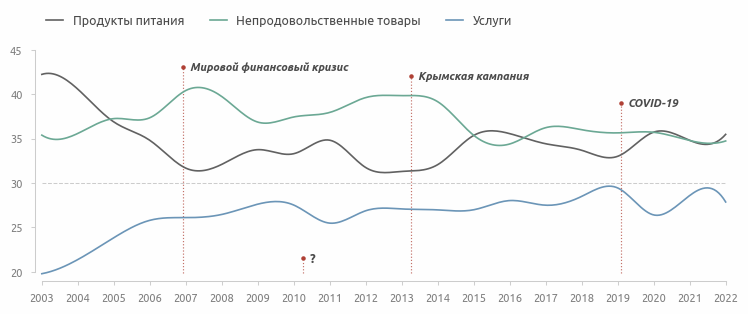

Images 'spend-structure-(cities).png' and 'spend-structure-(cities).svg' successfully saved into 'docs/img/' directory


In [1082]:
fig, ax = plt.subplots(figsize=(9, 3))

plt.plot(
    smoothed(
        spends_plot_town['food_frac']),
    color=alpha_color(palette[0], 0.9))
plt.plot(
    smoothed(
        spends_plot_town['goods_frac']),
    color=alpha_color(palette[3], 0.9))
plt.plot(
    smoothed(
        spends_plot_town['services_frac']),
    color=alpha_color(palette[2], 0.9))

plt.legend(
    labels=['Продукты питания', 'Непродовольственные товары', 'Услуги'],
    **legend_inline(bbox_to_anchor=(0, 1.05)), handlelength=1.35, fontsize=9)

# plt.axhline(30, lw=0.75, ls='--', color=palette[-2])
plot_hline(30)

# Crisis 2008 - August 2007
plot_timemarker(
    text='Мировой финансовый кризис', x=2006.92,
    y_text=43, y_line=0.93, y_min=0.035, size=8, delta=0.2,
    weight='bold', style='italic')

# ?
plot_timemarker(
    text='?', x=2010.25,
    y_text=21.55, y_line=0.085, y_min=0.035, size=9, delta=0.2,
    weight='bold', style='normal')

# Crimea - March 2014
plot_timemarker(
    text='Крымская кампания', x=2013.25,
    y_text=42, y_line=0.89, y_min=0.035, size=8, delta=0.2,
    weight='bold', style='italic')

# COVID - January 2019
plot_timemarker(
    text='COVID-19', x=2019.08,
    y_text=39, y_line=0.77, y_min=0.035, size=8, delta=0.2,
    weight='bold', style='italic')

plt.xticks(
    ticks=spends_plot_town.index.tolist(),
    labels=spends_plot_town.index.tolist())

plt.ylim(19, 45)
axis_rstyle(offset_bottom=0, offset_left=0, yticks=[20, 45, 5], grid=False)

plt.show()

savefig('spend-structure-(cities)', dir=path_save_img, figure=fig, dpi=100)

## Officials

#### Численность работников государственных органов и органов местного самоуправления на 1000 человек занятых в экономике

In [1083]:
officials_number_1000_busy = economics_data['12.01'].copy()

In [1084]:
officials_number_1000_busy

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Российская Федерация,18.0,17.6,19.1,19.7,19.9,21.9,23.5,23.9,24.4,24.9,...,22.8,32.6,30.1,29.8,30.2,30.1,30.4,33.5,32.1,31.5
Центральный федеральный округ,15.1,14.7,16.2,16.8,16.9,18.9,20.1,20.5,20.7,21.1,...,18.8,27.7,23.8,23.3,23.3,23.3,23.6,25.6,24.9,24.4
Белгородская область,19.2,19.1,21.9,23.1,23.5,25.7,27.3,27.7,28.6,28.4,...,26.9,33.8,30.6,29.6,29.3,29.3,29.2,32.2,30.5,29.9
Брянская область,21.0,20.3,23.5,24.6,25.1,26.9,27.3,27.8,28.1,28.5,...,28.1,39.9,37.5,36.8,38.3,38.8,43.2,45.3,42.6,41.9
Владимирская область,17.5,16.4,17.7,18.1,18.6,20.4,21.5,22.1,23.3,22.1,...,17.5,26.5,26.8,27.3,27.9,28.0,27.3,32.0,31.5,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Амурская область,21.4,21.8,23.7,25.5,26.4,28.6,31.4,31.3,31.8,30.2,...,29.2,40.5,42.4,42.2,43.0,45.0,42.4,45.7,45.0,42.4
Магаданская область,37.4,36.7,41.2,43.6,44.7,53.4,57.9,60.5,62.5,65.3,...,63.8,84.3,78.2,74.9,76.6,75.9,72.2,80.6,74.0,77.9
Сахалинская область,28.6,28.0,30.6,31.0,31.8,35.8,35.5,37.5,37.8,39.1,...,32.1,37.0,42.9,42.6,42.5,42.4,42.9,45.9,46.9,46.5
Еврейская автономная область,37.9,38.7,39.7,40.8,40.4,45.0,47.2,49.1,50.3,47.5,...,48.9,67.9,70.0,66.9,74.5,75.5,74.6,93.1,93.7,79.9


In [1085]:
officials_number_1000_busy_rf = officials_number_1000_busy.iloc[0, :].copy()

In [1086]:
officials_number_1000_busy_rf_smoothed = \
    smoothed(officials_number_1000_busy_rf, return_type='df')

In [1087]:
officials_number_1000_busy_rf_smoothed.head()

,Российская Федерация
2000.000000,18.000000
2000.073579,17.829790
2000.147157,17.687288
2000.220736,17.571110
2000.294314,17.479873


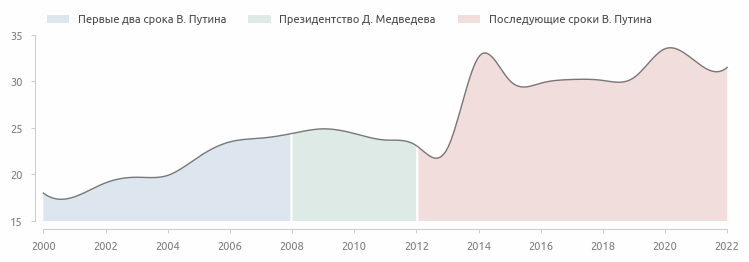

Images 'officials-1000-workers.png' and 'officials-1000-workers.svg' successfully saved into 'docs/img/' directory


In [1088]:
fig, ax = plt.subplots(figsize=(9, 2.5))

plt.plot(officials_number_1000_busy_rf_smoothed, lw=1, alpha=0.75)

plot_fill_between(
    x=officials_number_1000_busy_rf_smoothed.loc[2000:2008].index,
    y1=15, y2=officials_number_1000_busy_rf_smoothed.loc[2000:2008, 'Российская Федерация'],
    color=palette[2], alpha=0.2, ax=ax,
    label='Первые два срока В. Путина')
plot_fill_between(
    x=officials_number_1000_busy_rf_smoothed.loc[2008:2012].index,
    y1=15, y2=officials_number_1000_busy_rf_smoothed.loc[2008:2012, 'Российская Федерация'],
    color=palette[3], alpha=0.2, ax=ax,
    label='Президентство Д. Медведева')
plot_fill_between(
    x=officials_number_1000_busy_rf_smoothed.loc[2012:].index,
    y1=15, y2=officials_number_1000_busy_rf_smoothed.loc[2012:, 'Российская Федерация'],
    color=palette[1], alpha=0.2, ax=ax,
    label='Последующие сроки В. Путина')

plt.legend(**legend_inline(), fontsize=8)
axis_rstyle(
    offset_left=1,
    offset_bottom=1,
    xticks=[2000, 2022, 2],
    yticks=[15, 35, 5]
)
plt.show()

savefig('officials-1000-workers', dir=path_save_img, figure=fig, dpi=100)

# Financial stabilization

In [1089]:
pci = economics_data['9.5'].copy()

In [1090]:
pci

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Year,260.4,2608.8,939.9,315.1,231.3,121.8,111.0,184.4,136.5,120.2,...,111.4,112.9,105.4,102.5,104.3,103.0,104.9,108.4,111.9,107.4
January,106.2,345.3,125.8,117.9,117.8,104.1,102.3,101.5,108.4,102.3,...,100.6,103.8,101.0,100.6,100.3,101.0,100.4,100.7,101.0,100.8
February,104.8,138.0,124.7,110.8,111.0,102.8,101.5,100.9,104.1,101.0,...,100.7,102.2,100.6,100.2,100.2,100.4,100.3,100.8,101.2,100.5
March,106.3,129.9,120.1,107.4,108.9,102.8,101.4,100.6,102.8,100.6,...,101.0,101.2,100.5,100.1,100.3,100.3,100.6,100.7,107.6,100.4
April,163.5,121.7,118.7,108.5,108.5,102.2,101.0,100.4,103.0,100.9,...,100.9,100.5,100.4,100.3,100.4,100.3,100.8,100.6,101.6,100.4
May,103.0,111.9,118.1,106.9,107.9,101.6,100.9,100.5,102.2,101.8,...,100.9,100.4,100.4,100.4,100.4,100.3,100.3,100.7,100.1,100.3
June,101.2,119.1,119.9,106.0,106.7,101.2,101.1,100.1,101.9,102.6,...,100.6,100.2,100.4,100.6,100.5,100.0,100.2,100.7,99.6,100.4
July,100.6,110.6,122.4,105.3,105.4,100.7,100.9,100.2,102.8,101.8,...,100.5,100.8,100.5,100.1,100.3,100.2,100.4,100.3,99.6,100.6
August,100.5,108.6,126.0,104.6,104.6,99.8,99.9,103.7,101.2,101.0,...,100.2,100.4,100.0,99.5,100.0,99.8,100.0,100.2,99.5,100.3
September,101.1,111.5,123.0,108.0,104.5,100.3,99.7,138.4,101.5,101.3,...,100.6,100.6,100.2,99.8,100.2,99.8,99.9,100.6,100.0,100.9


In [1091]:
plot_data = pci[1992][1:]

In [1092]:
plot_data.index = plot_data.index + ' 1992'

In [1093]:
for i in range(1993, 2000):
    plot_data_ = pci[i][1:]
    plot_data_.index = plot_data_.index + ' ' + str(i)
    plot_data = pd.concat([plot_data, plot_data_], axis=0)

In [1094]:
plot_data.name = 'ИПЦ'

In [1095]:
plot_data.index = [to_date(x, kind='%B %Y') for x in plot_data.index]

In [1096]:
plot_data_smoothed = smoothed(plot_data, n=1200, datetime_index=True)

In [1097]:
plot_data_smoothed

,ИПЦ
1992-01-01 00:00:00.000000000,345.300000
1992-01-03 09:52:05.604670558,315.780544
1992-01-05 19:44:11.209341117,288.954132
1992-01-08 05:36:16.814011676,264.696635
1992-01-10 15:28:22.418682235,242.883924
...,...
1999-11-21 08:31:37.581317792,101.231942
1999-11-23 18:23:43.185988352,101.245640
1999-11-26 04:15:48.790658912,101.261527
1999-11-28 14:07:54.395329472,101.279637


In [1098]:
# Geraschenko - 17 July 1992
plot_text_ger = '''
Назначение
В.Геращенко на пост
председателя ЦБ
'''
# monetary reform 26 July - Decembder 1993
plot_text_reform = '''
Начало
денежной реформы
'''
# 'black tuesday' - 11 October 1994
plot_text_tuesday = '''
Черный вторник,
отставка В.Геращенко
'''
# President elections
plot_text_elec = '''
Выборы президента РФ
'''
# PCO January 1992
text_commentary = '''
*ИПЦ в Январе 1992 г.
составил 345.3%.
'''

In [1099]:
# Yeltsin - Supreme Soviet controversy active phase - March 20 1992 - 4 October 1993
start_controversy = dt.datetime.strptime('20-03-1992', '%d-%m-%Y')
end_controversy = dt.datetime.strptime('04-10-1993', '%d-%m-%Y')
plot_controversy = \
    plot_data_smoothed.loc[start_controversy:end_controversy].copy()

In [1100]:
# Gaidar stabilization - 2 January 1992 - 17 July 1992
start_stab1 = dt.datetime.strptime('02-12-1991', '%d-%m-%Y')
end_stab1 = dt.datetime.strptime('17-07-1992', '%d-%m-%Y')
plot_stab1 = plot_data_smoothed.loc[start_stab1:end_stab1].copy()

In [1101]:
# Gaidar-Fedorov stabilization - 1 September 1993 - 1 January 1994
start_stab2 = dt.datetime.strptime('01-08-1993', '%d-%m-%Y')
end_stab2 = dt.datetime.strptime('01-12-1993', '%d-%m-%Y')
plot_stab2 = plot_data_smoothed.loc[start_stab2:end_stab2].copy()

In [1102]:
# Chubais stabilization - 1 January 1995 - 16 January 1996
start_stab3 = dt.datetime.strptime('01-12-1994', '%d-%m-%Y')
end_stab3 =  dt.datetime.strptime('16-12-1995', '%d-%m-%Y')
plot_stab3 = plot_data_smoothed.loc[start_stab3:end_stab3].copy()

### Plots

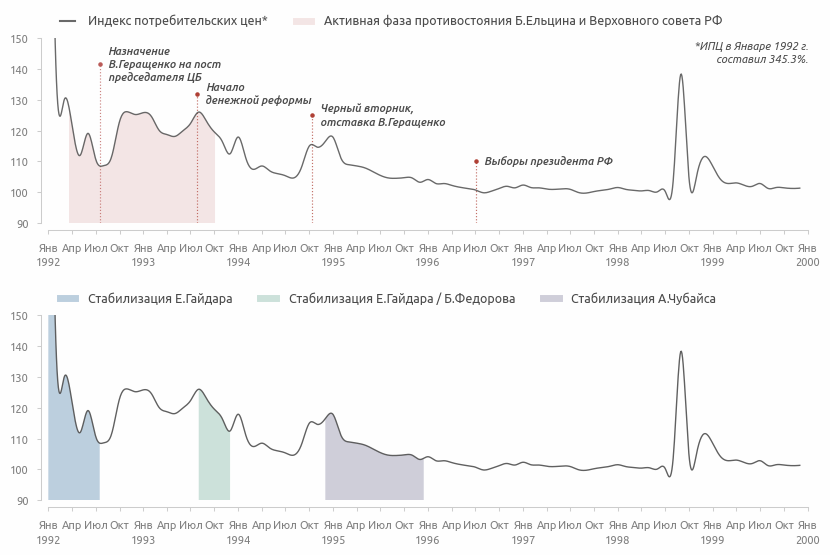

Images 'financial-stabilization-1990s.png' and 'financial-stabilization-1990s.svg' successfully saved into 'docs/img/' directory


In [1103]:
fig, ax = plt.subplots(nrows=2, figsize=(9.8, 6))

# AXIS 0
# PCI curve
ax[0].plot(
    plot_data_smoothed, color=palette[0], alpha=0.85, lw=1,
    label='Индекс потребительских цен*')
# Geraschenko to CB - 17 July 1992 (17 of 31 == 0.57 of 1.00)
plot_timemarker(
    text=plot_text_ger, x=dt.datetime.strptime('17-07-1992', '%d-%m-%Y'), 
    weight='medium', y_text=141.6, y_line=0.85, delta=dt.timedelta(days=30),
    color_scatter=palette[1], style='italic', ax=ax[0])
# monetary reform 26 July - Decembder 1993 (26 of 31 == 0.87 of 1.00)
plot_timemarker(
    text=plot_text_reform, x=dt.datetime.strptime('26-07-1993', '%d-%m-%Y'),
    weight='medium', y_text=132, y_line=0.7, delta=dt.timedelta(days=30),
    style='italic', ax=ax[0])
# 'black tuesday' - 11 October 1994 (11 of 31 == 0.37 of 1.00)
plot_timemarker(
    text=plot_text_tuesday, x=dt.datetime.strptime('11-10-1994', '%d-%m-%Y'),
    weight='medium', y_text=125, y_line=0.58, delta=dt.timedelta(days=30),
    style='italic', ax=ax[0])
# President elections 03 July 1996
plot_timemarker(
    text=plot_text_elec, x=dt.datetime.strptime('03-07-1996', '%d-%m-%Y'),
    weight='medium', y_text=110, y_line=0.33, delta=dt.timedelta(days=30),
    style='italic', ax=ax[0])
# Yeltsin - Supreme Soviet controversy active phase
ax[0].fill_between(
    x=plot_controversy.index,
    y1=85, y2=plot_controversy['ИПЦ'],
    color=palette[1], alpha=0.15, ec='none',
    label='Активная фаза противостояния Б.Ельцина и Верховного совета РФ')
# legend
ax[0].legend(
    **legend_inline(2),
    **legend_create_handles(
        2, ['l', 'r'],
        labels=[
            'Индекс потребительских цен*',
            'Активная фаза противостояния Б.Ельцина и Верховного совета РФ'],
        colors=[palette[0], palette[1]],
        alphas=[0.85, 0.15]),
    fontsize=9)
# axis limits
ax[0].set_xlim(
    dt.datetime.strptime('01-12-1991', '%d-%m-%Y'),
    dt.datetime.strptime('01-12-2000', '%d-%m-%Y'))
ax[0].set_ylim(90, 150)
axis_rstyle(
    offset_bottom=5, offset_left=5, ax=ax[0],
    xlim=[ax[0].get_xticks()[1], ax[0].get_xticks()[-1]])
axis_formatter_locator(
    formatter=mpl.dates.DateFormatter('%b'),
    locator=mpl.dates.MonthLocator([1, 4, 7, 10]),
    months_capitalize=True, ax=ax[0])
axis_add_date_xaxis(offset=21, ax=ax[0], labelcolor='#808080')
axis_translate_months(ax=ax[0])
# commentary
ax[0].text(
    x=1, y=0.80, s=text_commentary, style='italic', ha='right',
    fontsize=8, transform=ax[0].transAxes)
ax[0].tick_params(axis='both', direction='out')
ax[0].tick_params(
    which='minor', direction='out',
    color='#CCCCCC', labelcolor='#808080')
ax[0].tick_params(
    which='major', direction='out',
    color='#CCCCCC', labelcolor='#808080')

# AXIS 1
# PCI curve
ax[1].plot(
    plot_data_smoothed, color=palette[0], lw=1, alpha=0.9)
# Gaidar stabilization
ax[1].fill_between(
    x=plot_stab1.index,
    y1=85, y2=plot_stab1['ИПЦ'],
    color=palette[2], alpha=0.4, ec='none',
    label='Стабилизация Е.Гайдара')
# Fedorov stabilization
ax[1].fill_between(
    x=plot_stab2.index,
    y1=85, y2=plot_stab2['ИПЦ'],
    color=palette[3], alpha=0.3, ec='none',
    label='Стабилизация Е. Гайдара / Б.Федорова')
# Chubais stabilization
ax[1].fill_between(
    x=plot_stab3.index,
    y1=85, y2=plot_stab3['ИПЦ'],
    color=palette[7], alpha=0.3, ec='none',
    label='Стабилизация А.Чубайса')
# legend
ax[1].legend(
    **legend_inline(3),
    **legend_create_handles(
        3, 'r',
        labels=[
            'Стабилизация Е.Гайдара',
            'Стабилизация Е.Гайдара / Б.Федорова',
            'Стабилизация А.Чубайса'],
        colors=[palette[2], palette[3], palette[7]],
        alphas=[0.4, 0.3, 0.3]),
    fontsize=9)
# axis limits
ax[1].set_xlim(
    dt.datetime.strptime('01-12-1991', '%d-%m-%Y'),
    dt.datetime.strptime('01-12-2000', '%d-%m-%Y'))
ax[1].set_ylim(90, 150)
axis_rstyle(
    offset_bottom=5, offset_left=5, ax=ax[1],
    xlim=[ax[1].get_xticks()[1], ax[1].get_xticks()[-1]])
axis_formatter_locator(
    formatter=mpl.dates.DateFormatter('%b'),
    locator=mpl.dates.MonthLocator([1, 4, 7, 10]),
    months_capitalize=True, ax=ax[1])
axis_add_date_xaxis(offset=21, ax=ax[1], labelcolor='#808080')
axis_translate_months(ax=ax[1])

plt.subplots_adjust(hspace=0.5)
plt.show()

savefig('financial-stabilization-1990s', dir=path_save_img, figure=fig, dpi=100)

In [1104]:
set_location()

### Execution time

In [1105]:
stopwatch_stop(start)

Execution time: 0:00:25
